In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.shape

(1338, 7)

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Data Analysis

Text(0.5, 1.0, 'Distribution of Charges')

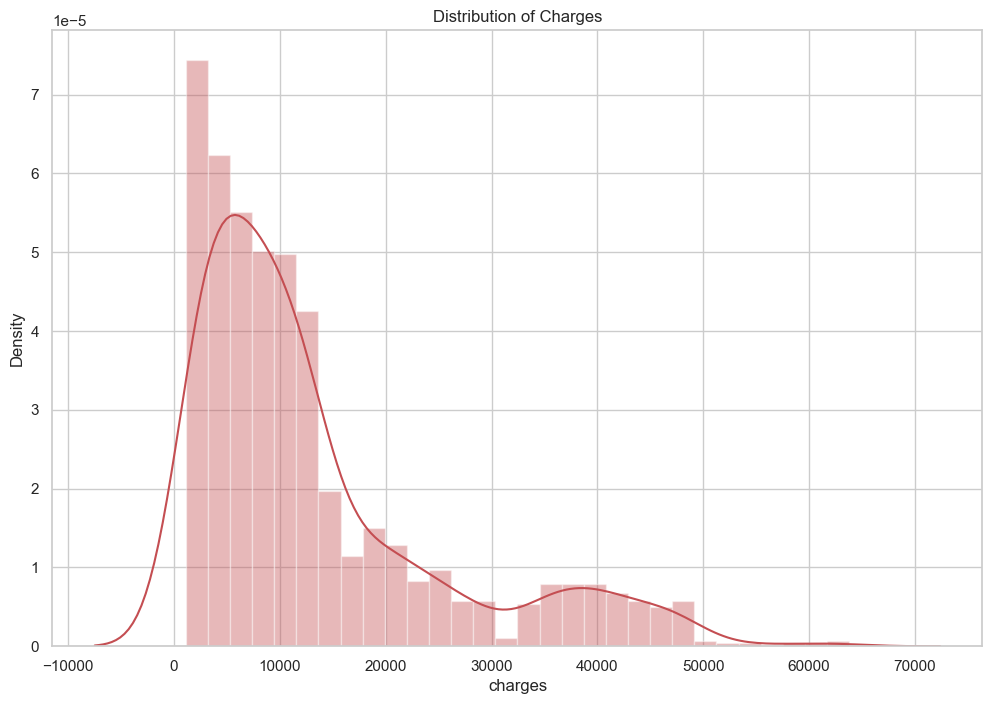

In [7]:
sns.set(style='whitegrid')
f, ax = plt.subplots(1,1, figsize=(12, 8))
ax = sns.distplot(df['charges'], kde = True, color = 'r')
plt.title('Distribution of Charges')

<AxesSubplot: xlabel='charges', ylabel='region'>

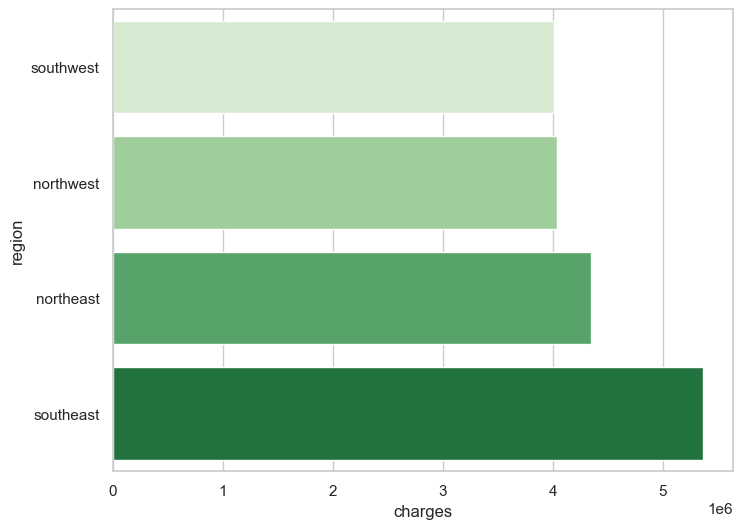

In [8]:
charges = df['charges'].groupby(df.region).sum().sort_values(ascending=True)
f, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.barplot(x=charges.head(), y=charges.head().index, palette='Greens', ax=ax)

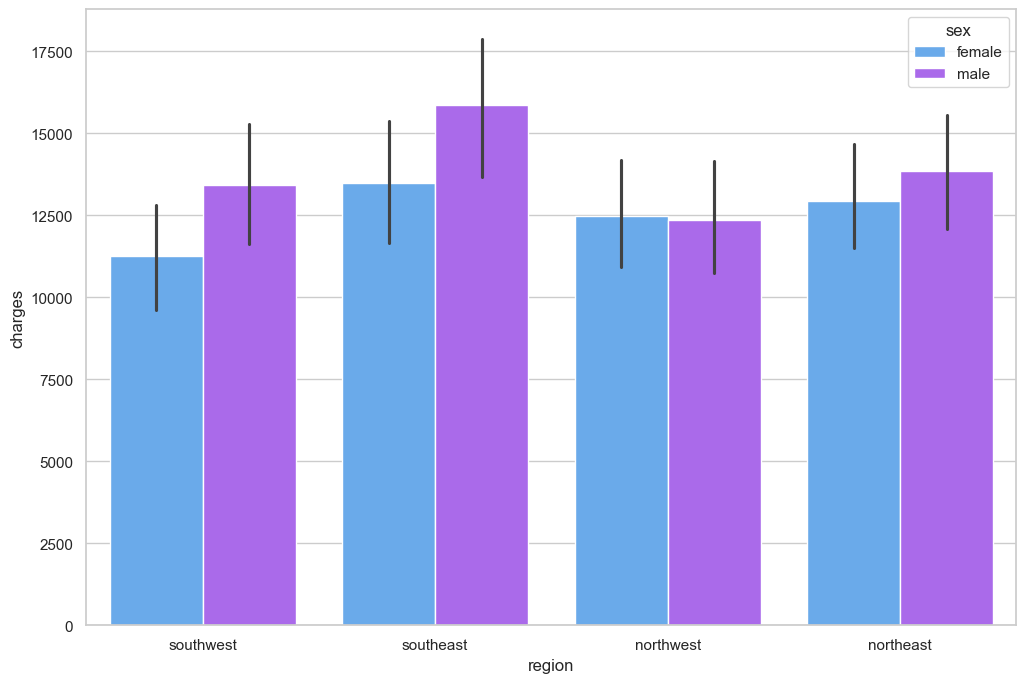

In [9]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='sex', data=df, palette='cool')

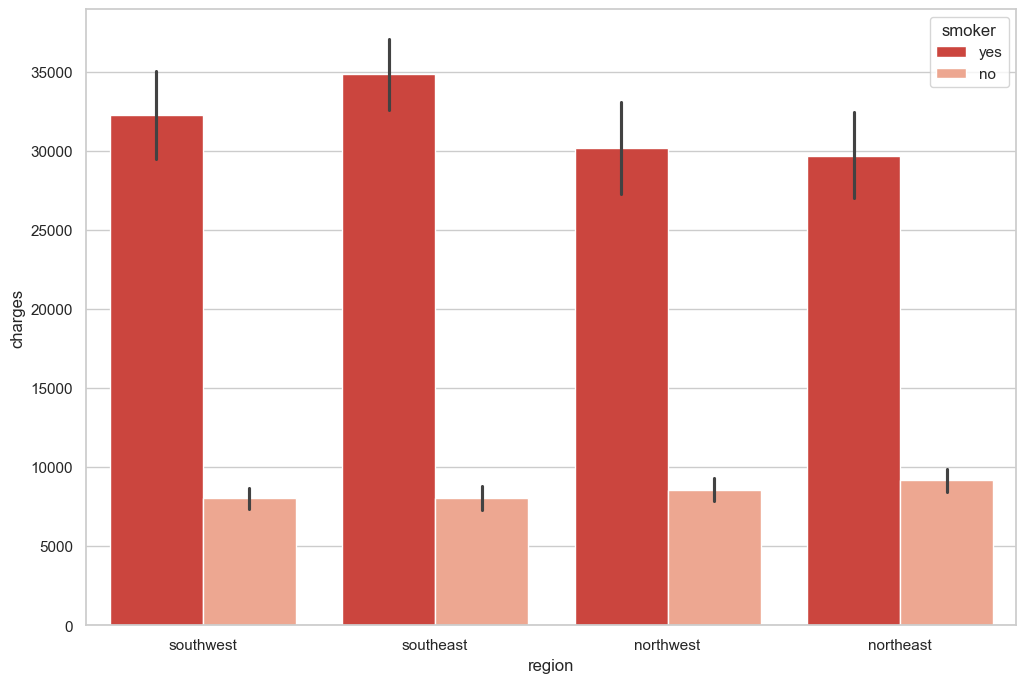

In [10]:
f, ax = plt.subplots(1,1, figsize=(12,8))
ax = sns.barplot(x = 'region', y = 'charges',
                 hue='smoker', data=df, palette='Reds_r')

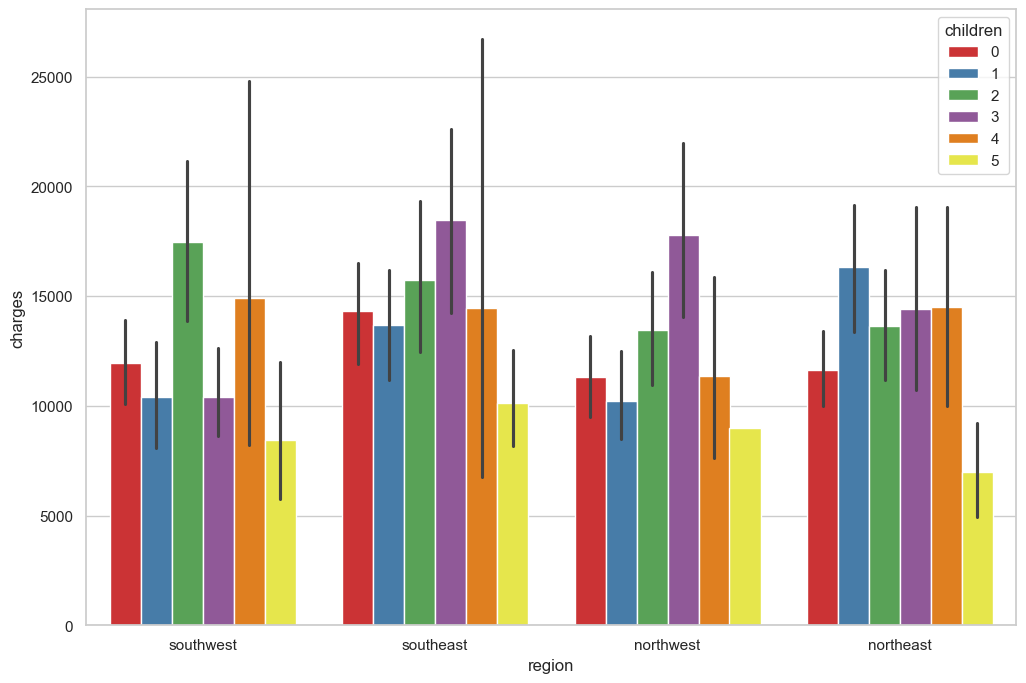

In [11]:
f, ax = plt.subplots(1, 1, figsize=(12, 8))
ax = sns.barplot(x='region', y='charges', hue='children', data=df, palette='Set1')

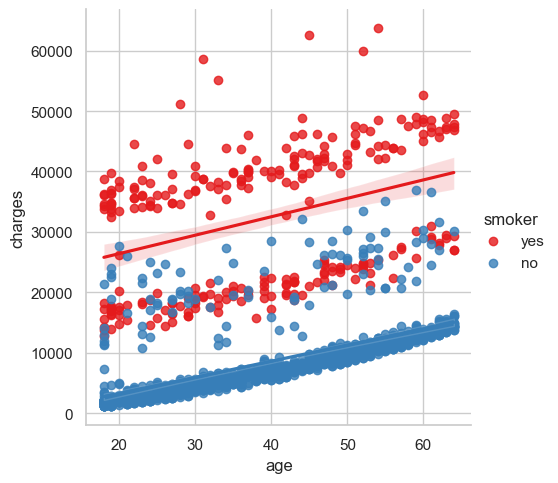

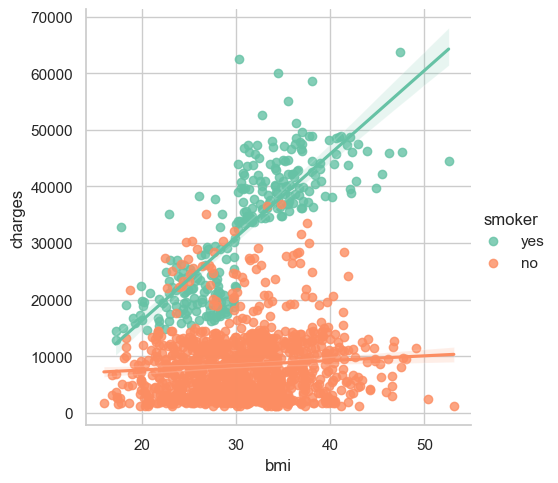

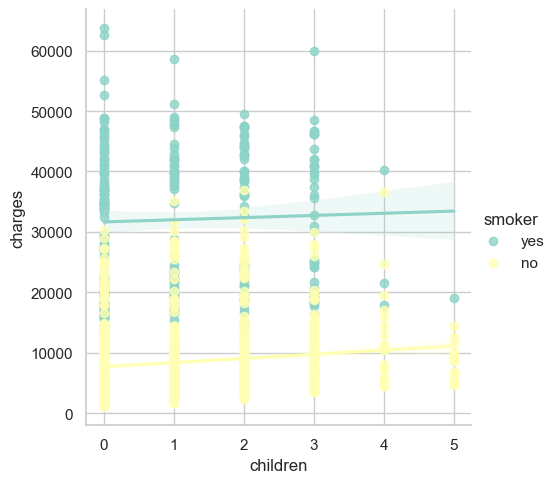

In [12]:
ax = sns.lmplot(x = 'age', y = 'charges', data=df, hue='smoker', palette='Set1')
ax = sns.lmplot(x = 'bmi', y = 'charges', data=df, hue='smoker', palette='Set2')
ax = sns.lmplot(x = 'children', y = 'charges', data=df, hue='smoker', palette='Set3')

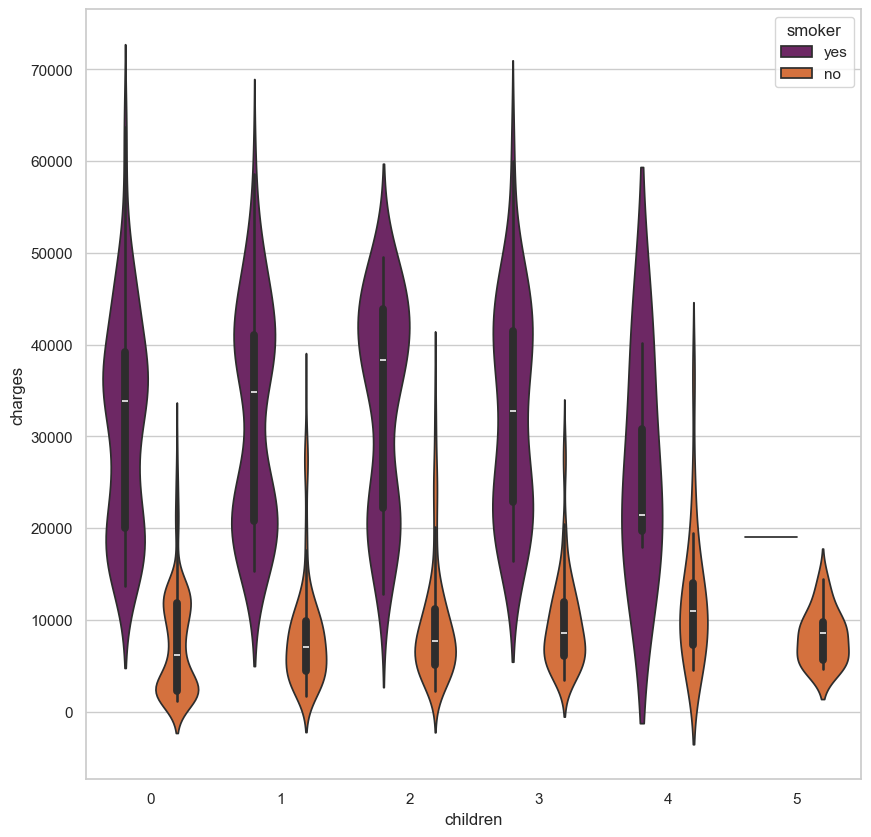

In [13]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.violinplot(x = 'children', y = 'charges', data=df,
                 orient='v', hue='smoker', palette='inferno')

In [14]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [15]:
##Converting category labels into numerical using LabelEncoder
from sklearn import preprocessing 
label_encoder = preprocessing.LabelEncoder()
df['smoker'] = label_encoder.fit_transform(df['smoker'])
df['sex'] = label_encoder.fit_transform(df['sex'])

df= pd.get_dummies(df, columns = ['region'])
df.dtypes

age                   int64
sex                   int32
bmi                 float64
children              int64
smoker                int32
charges             float64
region_northeast      uint8
region_northwest      uint8
region_southeast      uint8
region_southwest      uint8
dtype: object

In [16]:
df.head()

,age,sex,bmi,children,smoker,charges,region_northeast,region_northwest,region_southeast,region_southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0


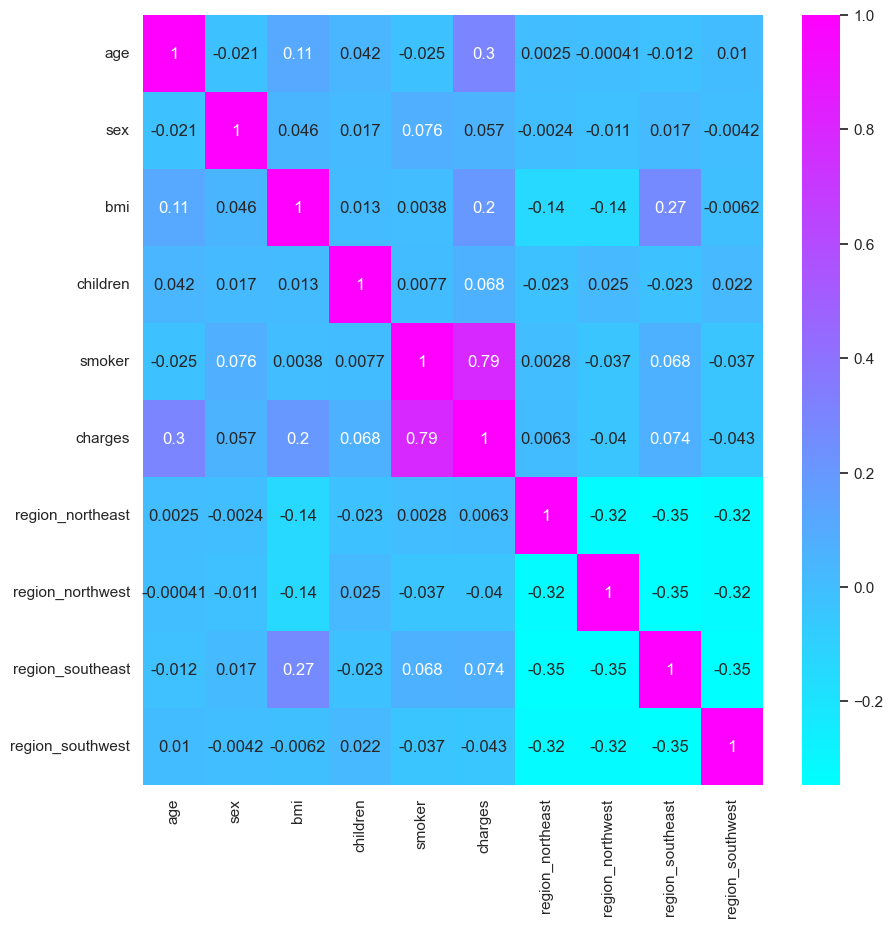

In [17]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))
ax = sns.heatmap(df.corr(), annot=True, cmap='cool')

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn import metrics
import pandas as pd

# Assuming df is your DataFrame with features and target variable

x = df.drop(['charges'], axis=1)
y = df['charges']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Define regressors
regressors = {
    'Linear Regressor': LinearRegression(),
    'Ridge Regressor': Ridge(alpha=0.5),
    'Lasso Regressor': Lasso(alpha=0.2),
    'Elasticnet Regressor': ElasticNet(alpha=20.0),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=1, n_jobs=-1),
    'Polynomial Regressor': make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
}

# Perform model selection
best_regressor = None
best_score = float('-inf')  # Initialize with negative infinity

for name, reg in regressors.items():
    reg.fit(x_train, y_train)
    y_test_pred = reg.predict(x_test)
    
    mse = metrics.mean_squared_error(y_test_pred, y_test)
    r2 = metrics.r2_score(y_test_pred, y_test)
    
    # Calculate adjusted R²
    n = len(y_test)  # Number of samples in the test set
    p = x_test.shape[1]  # Number of features
    adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
    
    print(f'\nRegressor: {name}')
    print(f'\nMSE: {mse}')
    print(f'\nR² Score: {r2}')
    print(f'\nAdjusted R² Score: {adjusted_r2}')

    score = adjusted_r2

    if score > best_score:
        best_score = score
        best_regressor = reg

    print("*" * 100)

# Now best_regressor holds the best model based on the adjusted R² score
print(f'\nBest Regressor: {best_regressor.__class__.__name__}')
print(f'\nBest Adjusted R² Score: {best_score}')


Regressor: Linear Regressor

MSE: 31827950.229523838

R² Score: 0.725734082445382

Adjusted R² Score: 0.7161666667167326
****************************************************************************************************

Regressor: Ridge Regressor

MSE: 31855370.664905995

R² Score: 0.7241592748873139

Adjusted R² Score: 0.71453692401129
****************************************************************************************************

Regressor: Lasso Regressor

MSE: 31829185.917610627

R² Score: 0.7257038063010772

Adjusted R² Score: 0.7161353344278589
****************************************************************************************************

Regressor: Elasticnet Regressor

MSE: 130870875.74341668

R² Score: -10.10687829994327

Adjusted R² Score: -10.494327542964546
****************************************************************************************************

Regressor: Random Forest Regressor

MSE: 19107545.904497858

R² Score: 0.8711835617535191

Adjusted R² 

In [19]:
reg = RandomForestRegressor(n_estimators=100, random_state=1, n_jobs=-1)

In [20]:
import pickle
pickle.dump(best_regressor, open('insurance_charges_model.p', 'wb'))